<h1 align="center">
    Basic Networks with NetworkX and Visuliation with Plotly
</h1>

<h2 align="center">
NetworkX and Plotly
</h2>

<h3 align="center">
by Andreas Putz
</h3>

---

**Notebook Purpose**: This notebook is a toy notebook to play with basic networks using NetworkX
* a small introduction to NetworkX
* some basic algorithms on networks
* have some fun with plots:
  * catch of the day - *Plotly* (https://plot.ly/). A web toolkit with an offline mode. This notebook uses the offline mode extensively. A little touchy at times, but works with python 3.X
  
This notebook has been run in an anaconda python 3.6 environment on an Ubuntu Linux machine. The approach in the original source did not work for me so I had to replace some packages with python 3 variations.

---

# Environment preparation

## Python environment

For this example I use an anaconda python 3.6 environmnet

    conda create -n py36 python=3.6 anaconda 
    conda install plotly networkx

## Package imports and some tests

In [1]:
import scipy as sp
import pandas as pd

import pylab as plt
%matplotlib notebook 

#--------------------------------------
# Needs a little more work
# For the Plotly example: https://plot.ly/python/graph-data-from-mysql-database-in-python/
#--------------------------------------
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)
#plotly.offline.init_notebook_mode()
print('Plotly Version: ', plotly.__version__)

import networkx as nx

Plotly Version:  2.0.11


# NetworkX Basics
## Basic Definitions:

http://networkx.readthedocs.io/en/latest/tutorial.html#drawing-graphs

**graph**: A graph is a collection of **nodes** (or vertices) and their **connections**  (called edges,links or others)

## Some basic graphs and their visualization

<IPython.core.display.Javascript object>


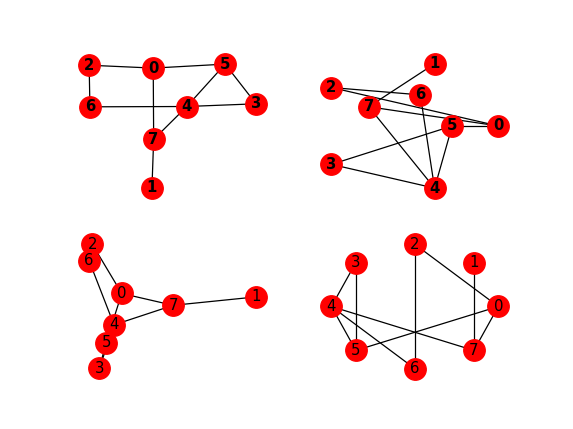

/home/andput/anaconda3/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/andput/anaconda3/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/andput/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/andput/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



In [2]:
# G = nx.petersen_graph()
G = nx.sedgewick_maze_graph()

plt.figure()
plt.subplot(221)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(222)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.subplot(223)
nx.draw_spectral(G,with_labels=True)
plt.subplot(224)
nx.draw_circular(G, with_labels=True)

# Network Plots with Plotly

## Default example on Plotly (https://plot.ly/python/network-graphs/)

Modification for this notebook: Extension to 3D

In [4]:
# Generate a random graph (200 nodes)

G=nx.random_geometric_graph(100,0.3,dim=3)
pos=nx.get_node_attributes(G,'pos')

# Find the node closest to the center (0.5,0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y,z=pos[n]
    d=(x-0.5)**2+(y-0.5)**2+(z-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d
        
print('Node closest to the center: ', ncenter, ', Distance = ',d)

# Compute shortest path between two reandom nodes
alg_sp = nx.shortest_path(G,25,67)
print(alg_sp)


Node closest to the center:  34 , Distance =  0.22048869310105962
[25, 84, 24, 33, 74, 67]


### Create the nodes and edges

In [5]:
#------------------------------
# Edges
#------------------------------

edge_trace = Scatter3d(
    x=[],
    y=[],
    z=[],
    line=Line(width=4,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0, z0 = G.node[edge[0]]['pos']
    x1, y1, z1 = G.node[edge[1]]['pos']
    edge_trace['x'] += [x0, x1, None]
    edge_trace['y'] += [y0, y1, None]
    edge_trace['z'] += [z0, z1, None]

    
#------------------------------
# Nodes
#------------------------------
node_trace = Scatter3d(
    x=[],
    y=[],
    z=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y, z = G.node[node]['pos']
    node_trace['x'].append(x)
    node_trace['y'].append(y)
    node_trace['z'].append(z)

#------------------------------
# Mark Center
#------------------------------
center_trace = Scatter3d(
    x=[0.5],
    y=[0.5],
    z=[0.5],
    text=['center'],
    mode='markers',
    hoverinfo='text',
    marker=Marker(
        #showscale=True,
        # colorscale options
        # 'Greys' | 'Greens' | 'Bluered' | 'Hot' | 'Picnic' | 'Portland' |
        # Jet' | 'RdBu' | 'Blackbody' | 'Earth' | 'Electric' | 'YIOrRd' | 'YIGnBu'
        colorscale='YIGnBu',
        reversescale=True,
        color=['red'],
        size=10,
        #colorbar=dict(
        #    thickness=15,
        #    title='Node Connections',
        #    xanchor='left',
        #    titleside='left'
        #),
        opacity=0.8,
        line=dict(width=2,color='rgb(204, 204, 204)')
    )
)

#------------------------------
# Draw Shortest path
#------------------------------
short_path_trace = Scatter3d(
    x=[],
    y=[],
    z=[],
    line=Line(width=8,color='red'),
    hoverinfo='none',
    mode='lines')

# note the fun itertools zip application:
for node, nnode in zip(alg_sp,alg_sp[1:]):
    x0, y0, z0 = G.node[node]['pos']
    x1, y1, z1 = G.node[nnode]['pos']
    short_path_trace['x'] += [x0, x1, None]
    short_path_trace['y'] += [y0, y1, None]
    short_path_trace['z'] += [z0, z1, None]

### Coloring scheme for nodes

In [6]:
for node, adjacencies in enumerate(G.adjacency_list()):
    node_trace['marker']['color'].append(len(adjacencies))
    node_info = 'Node ' + str(node) +', # of connections: '+str(len(adjacencies))
    node_trace['text'].append(node_info)

### Plot

In [7]:
fig = Figure(data=Data([edge_trace, node_trace,center_trace,short_path_trace]),
             layout=Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Original Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))
plotly.offline.iplot(fig, filename='networkx')

# Conclusions

* Played with the very basics of NetworkX
  * Generated a random, undirected, unweighted network, with random node positions and random connections
  * Calculated the shortest path between two nodes
* Played with some visualization tools
  * Played with the NetworkX plotting basics
  * Plotly:
    * 2D looks great, 3D is OK considering that it is rendered in the notebook. Does not really have a WOW effect though.
    * Way to many for loops for my liking. There should be a way more efficient way to do this.
    * Somewhat un-intuitive
    
Things to try:
* Other network packages: e.g graph-tool
* Other plotting packages: vispy (again), ...